## Stock Price Prediction

In this notebook, we will discover and explore data from the stock market, particularly to Tata Investment.I will use **yfinance** to get stock information, and visualize different aspects of it using Seaborn and Matplotlib. Firstly I will look at a few ways of analyzing the risk of a stock, based on its previous performance history hen we will also be predicting future stock prices through a **Long Short Term Memory (LSTM)** method!

We'll be answering the following questions along the way:

* How can we attempt to predict future stock behavior? (Predicting the closing price stock price of **TATAINVESTMENT**  using **LSTM**)

### Download the Data set

In [1]:
#install import library
!pip install -q yfinance

In [2]:
#import essential library for analysis
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

In [5]:
#Get the stock data of TATA Investment
df = pdr.get_data_yahoo('TATAINVEST.NS', start='2013-01-01', end=datetime.now())
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,462.950012,468.850006,462.049988,467.600006,345.631470,7826
2013-01-02,455.000000,474.649994,455.000000,471.200012,348.292511,12235
2013-01-03,477.899994,479.000000,471.200012,477.350006,352.838257,16238
2013-01-04,477.950012,477.950012,468.000000,470.649994,347.885986,9100
2013-01-07,472.149994,475.549988,465.100006,468.450012,346.259827,9347


In [6]:
df.shape

(2631, 6)

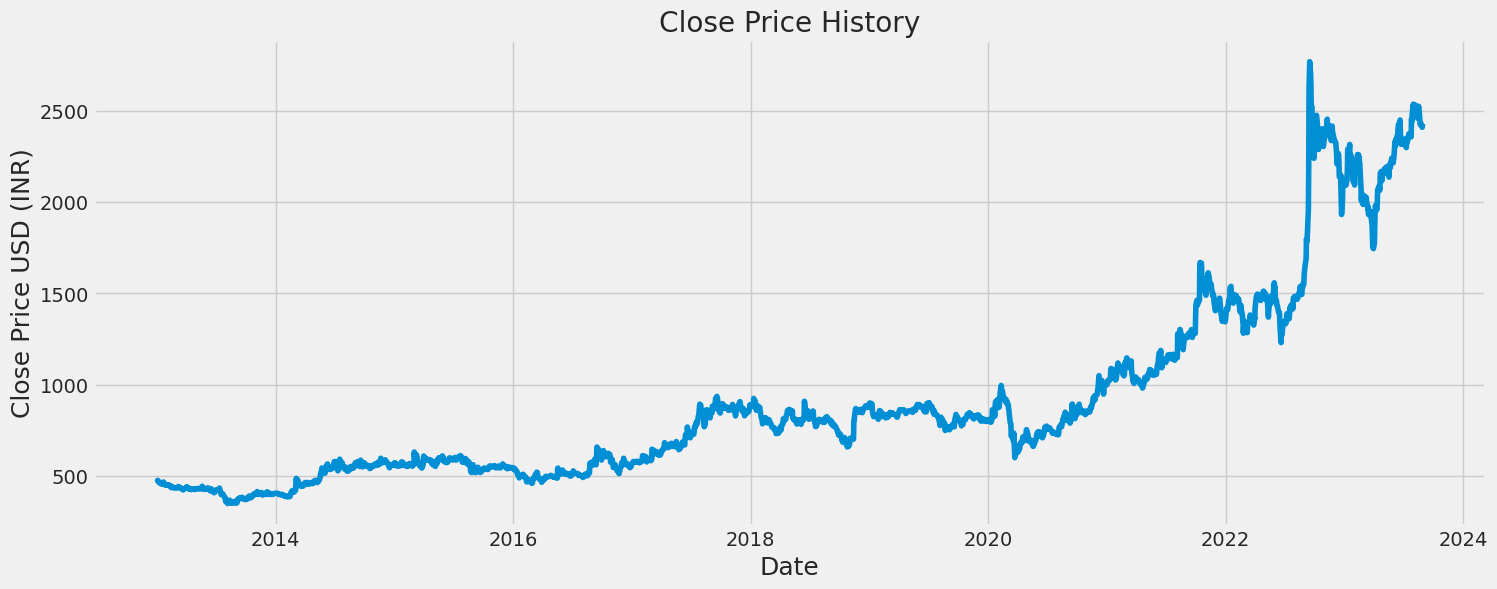

In [7]:
#Plot the time series data set
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD (INR)', fontsize=18)
plt.show()

In [8]:
# Create a new dataframe with only the 'close' column
data = df.filter(['Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model
training_data_len = int(np.ceil( len(dataset) * .95))
#np.ceil(): It ensures that the calculated training data length is always rounded up to the nearest whole number.

training_data_len

2500

In [9]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04841713],
       [0.04990689],
       [0.05245189],
       ...,
       [0.85853504],
       [0.85143804],
       [0.85890744]])

In [10]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
#It starts from index 60 because we need at least 60 data points to create a sequence of past data points for prediction.
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.04841713, 0.04990689, 0.05245189, 0.04967928, 0.04876888,
       0.04814815, 0.0468653 , 0.04564452, 0.04554107, 0.04438237,
       0.04533415, 0.04489965, 0.04448582, 0.04444444, 0.04866543,
       0.04568591, 0.04378232, 0.0424581 , 0.04324436, 0.04297538,
       0.04189944, 0.04117525, 0.04165114, 0.04187874, 0.04196151,
       0.04074073, 0.04127871, 0.04113387, 0.04111318, 0.0405959 ,
       0.03813366, 0.03867162, 0.03591971, 0.03575419, 0.03687151,
       0.03658183, 0.03647837, 0.03594041, 0.03612662, 0.03585764,
       0.03496793, 0.03505068, 0.03484377, 0.03492654, 0.03494723,
       0.03500931, 0.03556796, 0.03829919, 0.03685081, 0.03676805,
       0.03523691, 0.0347817 , 0.03527829, 0.03531968, 0.03449204,
       0.03418167, 0.03267121, 0.03101592, 0.03080901, 0.03234016])]
[0.032940204050382754]

[array([0.04841713, 0.04990689, 0.05245189, 0.04967928, 0.04876888,
       0.04814815, 0.0468653 , 0.04564452, 0.04554107, 0.04438237,
       0.04533415, 0.04489965, 0.0

In [11]:
#Now make LSTM model
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [12]:
# Build the  LSTM (Long Short-Term Memory) model
#The LSTM model is a type of recurrent neural network (RNN) that is well-suited for sequence data, such as time series data.
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2440/2440 [==============================] - 128s 51ms/step - loss: 0.0012


In [13]:
#Creating the testing data set

test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

#Convert the data to numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [14]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squarred error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

rmse

5/5 [==============================] - 1s 34ms/step


78.3927050354782

<ipython-input-17-e8c5cebcb6c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


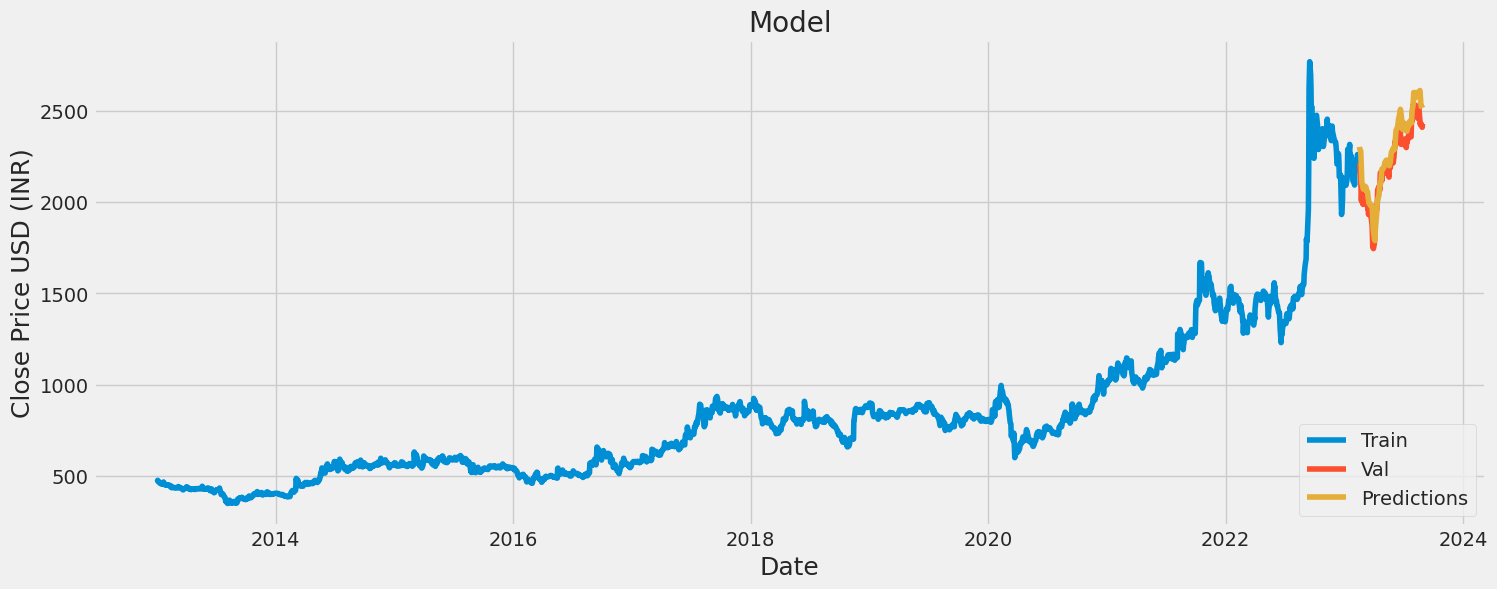

In [17]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD (INR)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [16]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-02-16,2216.399902,2300.991455
2023-02-17,2213.350098,2289.401123
2023-02-20,2107.050049,2279.252197
2023-02-21,2066.600098,2236.173096
2023-02-22,2006.199951,2183.167969
...,...,...
2023-08-23,2430.600098,2557.065430
2023-08-24,2424.850098,2534.146484
2023-08-25,2425.250000,2521.705078


In [19]:
def calculate_mape(actual_prices, predicted_prices):
    n = len(actual_prices)
    total_mape = 0

    for actual, predicted in zip(actual_prices, predicted_prices):
        mape = abs((actual - predicted) / actual) * 100
        total_mape += mape

    mean_mape = total_mape / n
    return mean_mape

# Example data
actual_prices = valid['Close']
predicted_prices = valid['Predictions']

mape = calculate_mape(actual_prices, predicted_prices)
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")



Mean Absolute Percentage Error (MAPE): 3.08%
